In [2]:
import pandas as pd
import json
from fileinput import filename
from pyrogram import Client, filters
import os
import datetime
from sklearn.cluster import KMeans
import numpy as np  
#import asyncio
import sys
import service
import Channels
import seaborn as sns
import matplotlib.pyplot as plt
import pyperclip as pyp

In [73]:
#Считываем данные и буфера в таблицу
df1 = pd.read_csv("E:/Работа/Zesta/Zesta/result.csv", sep = "*", parse_dates = ["date"])
df1 = df1.iloc[:,1:].fillna(0)
df1 = df1.set_index('date')
#Добавляем столбец с количеством реакций
df1.insert(3, "all_reactions", df1.iloc[:,3:].sum(axis = 1,numeric_only = True))
#Приводим типы столбцов реакций в к Int
d = dict(zip(Channels.REACTIONS + ["all_reactions"], ["int"]*(len(Channels.REACTIONS)+1)))
df1 = df1.astype(d)
#Формируем таблицу реакций
df2 = df1[Channels.REACTIONS]
#Число загруженных постов
df2


,👍,👎,😢,🤬,😁,❤
date,,,,,,
2022-07-12 19:45:17,117,49,50,24,79,338
2022-07-12 19:29:26,123,69,40,1575,13,6
2022-07-12 19:18:50,133,221,20,17,2532,3
2022-07-12 18:55:47,101,699,4,0,63,4
2022-07-12 18:37:55,282,11,26,21,1157,4
...,...,...,...,...,...,...
2022-06-08 12:58:28,95,51,11,175,645,1
2022-06-08 12:28:01,96,5,5,5,589,1
2022-06-08 12:23:20,99,1,941,77,0,8


In [30]:
#Корреляция количества реакций просмотров от времени нахождения в топе
#Вычисляем столбец нахождения новости в топе
#top_time = df2.index.shift()
df3 = df2.reset_index()
top_time = abs(df3.date - df3.date.shift(1))
#Для чистоты эксперимента нам нужно удалить последние записи дня, которые находились в топе очень долго


(0   2022-07-12 17:50:29
 1   2022-07-12 17:34:47
 2   2022-07-12 17:26:00
 3   2022-07-12 17:18:56
 4   2022-07-12 16:58:14
 5   2022-07-12 16:52:28
 6   2022-07-12 16:44:18
 7   2022-07-12 16:33:01
 Name: date, dtype: datetime64[ns],
 0               NaT
 1   0 days 00:15:42
 2   0 days 00:08:47
 3   0 days 00:07:04
 4   0 days 00:20:42
 5   0 days 00:05:46
 6   0 days 00:08:10
 7   0 days 00:11:17
 Name: date, dtype: timedelta64[ns])

In [12]:
#Однозначность восприятия новости
one_point = df2.T.max()/(df2.T.sum() - df2.T.max())
main_reaction = df2.T.idxmax()
df2.insert(0, "one_point", one_point.T)
df2.insert(0, "main_reaction", main_reaction.T)
#Расшифровка реакции
l = [Channels.REACTIONS_FULL[r] for r in df2.main_reaction]
df2
#grid = sns.displot(one_point)
#grid.fig.set_figheight(5)
#grid.fig.set_figwidth(10)
#grid.ax.set_xticks(np.arange(0,40,1))


,main_reaction,one_point,👍,👎,😢,🤬,😁,❤
date,,,,,,,,
2022-07-12 16:58:14,😢,4.149837,164,31,1274,5,41,66
2022-07-12 16:52:28,😁,1.643123,150,61,8,314,884,5
2022-07-12 16:44:18,🤬,3.759777,97,17,60,673,2,3
2022-07-12 16:33:01,👍,0.945402,329,18,15,48,265,2
2022-07-12 16:23:07,🤬,2.510549,135,4,44,595,49,5
...,...,...,...,...,...,...,...,...
2022-07-09 12:58:43,😁,3.830508,189,23,2,14,904,8
2022-07-09 12:50:27,🤬,3.818720,172,383,169,3223,111,9
2022-07-09 12:46:54,😁,7.288820,105,190,14,10,2347,3


c:\Users\Zerg\AppData\Local\Programs\Python\Python38\lib\site-packages\seaborn\axisgrid.py:88: UserWarning: Glyph 129324 (\N{SERIOUS FACE WITH SYMBOLS COVERING MOUTH}) missing from current font.
  self._figure.tight_layout(*args, **kwargs)
c:\Users\Zerg\AppData\Local\Programs\Python\Python38\lib\site-packages\seaborn\axisgrid.py:88: UserWarning: Glyph 128077 (\N{THUMBS UP SIGN}) missing from current font.
  self._figure.tight_layout(*args, **kwargs)
c:\Users\Zerg\AppData\Local\Programs\Python\Python38\lib\site-packages\seaborn\axisgrid.py:88: UserWarning: Glyph 128078 (\N{THUMBS DOWN SIGN}) missing from current font.
  self._figure.tight_layout(*args, **kwargs)
c:\Users\Zerg\AppData\Local\Programs\Python\Python38\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 129324 (\N{SERIOUS FACE WITH SYMBOLS COVERING MOUTH}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\Zerg\AppData\Local\Programs\Python\Python38\lib\site-packages\IPython\core\p

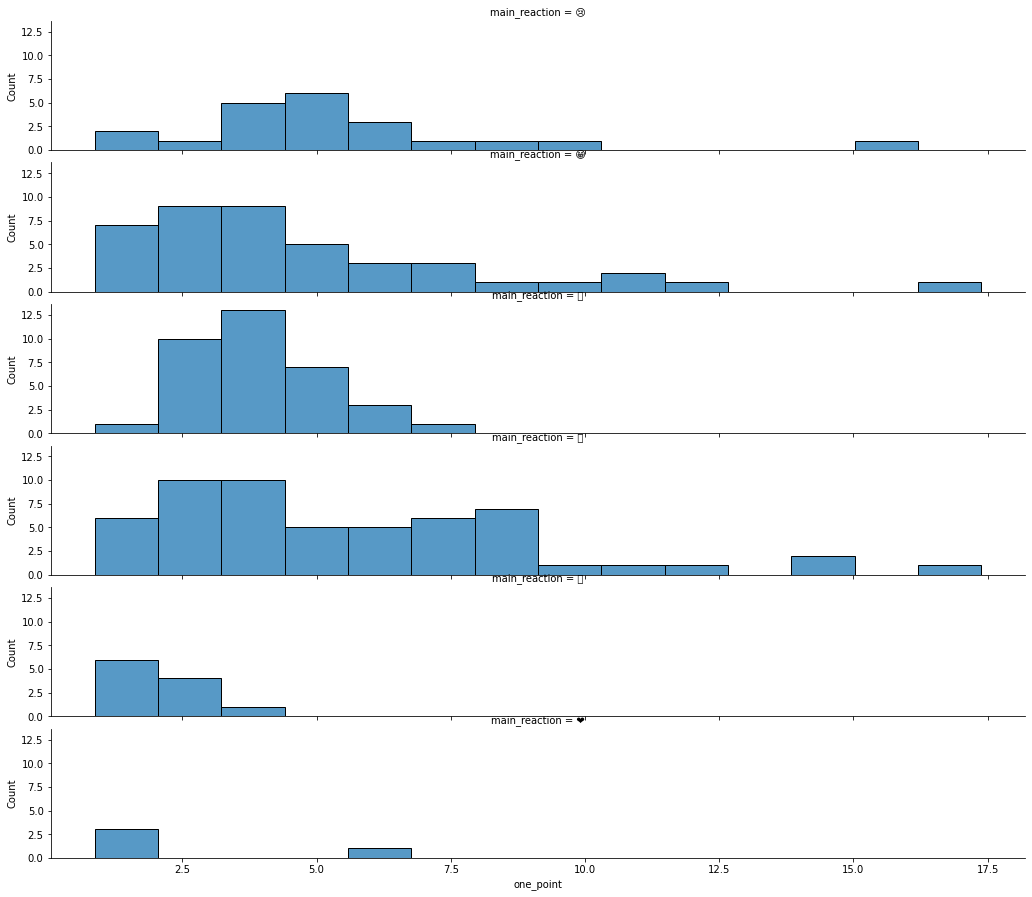

In [6]:
#Строим графики однозначности восприятия новости
grid = sns.displot(data=df2, x = "one_point", row = "main_reaction")
grid.fig.set_figheight(12)
grid.fig.set_figwidth(16)
#grid.ax.set_xticks(np.arange(0,40,1))

In [39]:
df2

,👍,👎,😢,🤬,😁,❤
date,,,,,,
2022-07-12 18:37:55,280,10,25,21,1152,4
2022-07-12 18:23:01,1532,4,74,68,247,28
2022-07-12 18:17:50,116,0,8,14,1010,3
2022-07-12 18:12:52,1377,34,30,139,80,6
2022-07-12 18:04:23,107,64,54,2069,15,4
...,...,...,...,...,...,...
2022-07-11 17:35:33,631,8,4,69,64,2
2022-07-11 17:19:47,131,52,202,1993,6,27
2022-07-11 17:15:37,2605,958,207,345,51,23


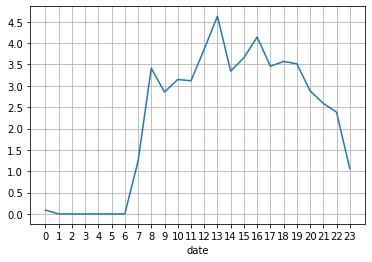

In [79]:
#Вычисляем динамику изменения количества реакций в течение дня
#Исключаем из подсчета субботы и воскресенья
#df2 = df1[df1.index.day_of_week <= 5]
df2 = df1[["all_reactions"] + Channels.REACTIONS]

df3 = df2.groupby(df2.index.hour).all_reactions.mean()

df3 = df3.astype("int")

#График общего количества постов по часам
#ax = df2.groupby(df2.index.hour).size().plot()

#График среднего количества постов по часам
df3 = df2.resample("1H").size()
ax = df3.groupby(df3.index.hour).mean().plot()
ax.set_xticks(np.arange(0,24,1))
ax.set_yticks(np.arange(0,5,0.5))
ax.grid()

df3 = df2.groupby(len(df2.text)).all_reactions.mean()

In [14]:
#Формируеим кластеры методом K-Средних

k_maens = KMeans(init="k-means++",n_clusters=15,n_init=30)
k_maens.fit(df2)
labels=k_maens.labels_
df1["group number"] = labels
df1[df1["group number"] == 8]
df1["group number"].value_counts()


8     146
13    128
5     125
1      98
2      89
14     60
9      54
0      41
7      36
3      34
11     23
10     21
4      15
6      12
12      3
Name: group number, dtype: int64

In [15]:
#Ищем сообщения с преобладающей реакцией
#df1[df1[Channels.REACTIONS[0]] == df1[Channels.REACTIONS].max(axis = 1)].sort_values(Channels.REACTIONS[0])
#Количество сообщений самой слабой реакции
df2.T.idxmax().value_counts()
#Количество сообщений самой сильной реакции
#df2.T.idxmax().value_counts()

👍    280
😁    239
🤬    175
😢    104
👎     53
❤     34
dtype: int64

In [84]:
#js = json.loads(pyp.paste())
js["reactions"]#[1]["reaction"]
d2 = {react["reaction"]: react["title"] for react in js["reactions"]}
Channels.REACTIONS_FULL.keys


AttributeError: module 'Channels' has no attribute 'REACTIONS_FULL'